<a href="https://colab.research.google.com/github/Student-NitinRaj/Data-Visualization-Hub/blob/main/S400_Data_Annalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-203a01996bb7>:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


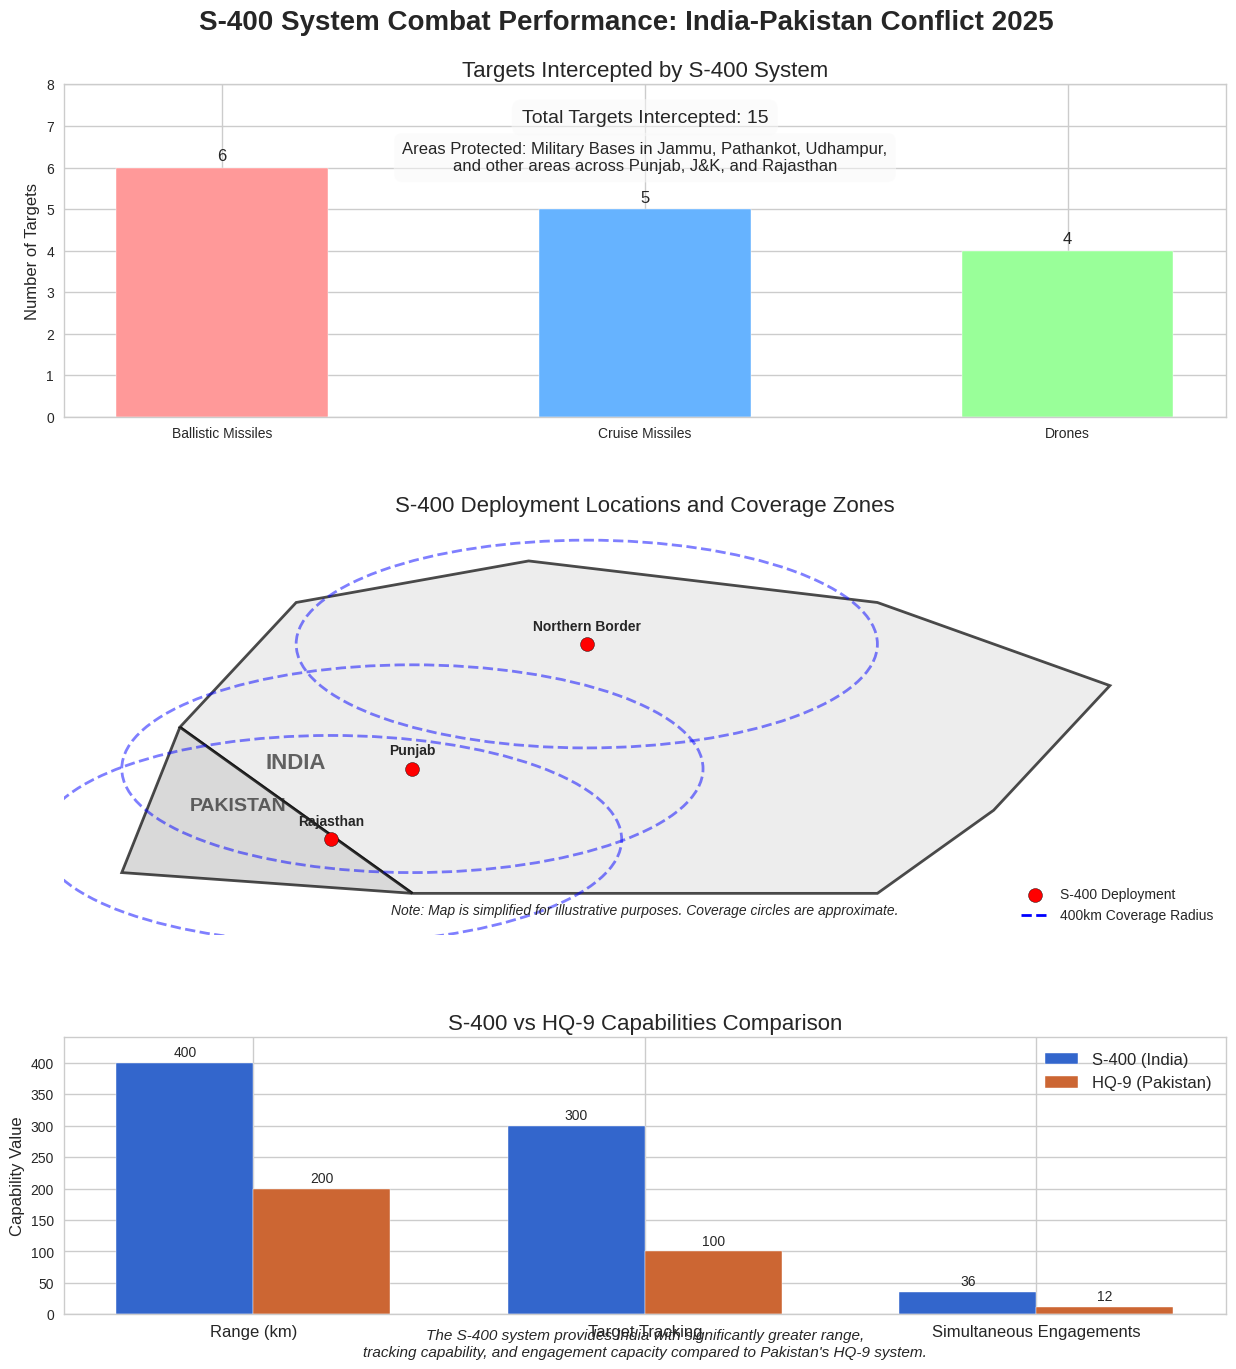

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.path import Path
import matplotlib.gridspec as gridspec

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with multiple subplots
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1.2, 1.5, 1], hspace=0.3)

# Title for the entire figure
fig.suptitle('S-400 System Combat Performance: India-Pakistan Conflict 2025', fontsize=20, fontweight='bold', y=0.98)

# =============================================================================
# PLOT 1: Targets Intercepted
# =============================================================================
ax1 = fig.add_subplot(gs[0])

# Data
target_types = ['Ballistic Missiles', 'Cruise Missiles', 'Drones']
target_counts = [6, 5, 4]  # Total: 15 targets as reported
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create bar chart
bars = ax1.bar(target_types, target_counts, color=colors, width=0.5)
ax1.set_title('Targets Intercepted by S-400 System', fontsize=16)
ax1.set_ylabel('Number of Targets', fontsize=12)
ax1.set_ylim(0, 8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', va='bottom', fontsize=12)

# Add total count as text
ax1.text(0.5, 0.9, f'Total Targets Intercepted: 15',
         horizontalalignment='center', verticalalignment='center',
         transform=ax1.transAxes, fontsize=14,
         bbox=dict(facecolor='#f9f9f9', alpha=0.5, boxstyle='round,pad=0.5'))

# Add areas protected
protected_areas = "Areas Protected: Military Bases in Jammu, Pathankot, Udhampur,\nand other areas across Punjab, J&K, and Rajasthan"
ax1.text(0.5, 0.78, protected_areas,
         horizontalalignment='center', verticalalignment='center',
         transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='#f9f9f9', alpha=0.5, boxstyle='round,pad=0.5'))

# =============================================================================
# PLOT 2: Map-style diagram with S-400 deployment
# =============================================================================
ax2 = fig.add_subplot(gs[1])

# Simplified map coordinates (approximate)
india_outline = np.array([
    [0.3, 0.1], [0.7, 0.1], [0.8, 0.3], [0.9, 0.6], [0.7, 0.8],
    [0.4, 0.9], [0.2, 0.8], [0.1, 0.5], [0.3, 0.1]
])

# Draw simplified India outline
india_path = Path(india_outline)
patch = patches.PathPatch(india_path, facecolor='#e6e6e6', edgecolor='black', linewidth=2, alpha=0.7)
ax2.add_patch(patch)

# Pakistan region (simplified)
pakistan_outline = np.array([
    [0.1, 0.5], [0.3, 0.1], [0.05, 0.15], [0.1, 0.5]
])
pakistan_path = Path(pakistan_outline)
patch = patches.PathPatch(pakistan_path, facecolor='#c9c9c9', edgecolor='black', linewidth=2, alpha=0.7)
ax2.add_patch(patch)

# Add deployment locations and coverage circles
deployment_sites = {
    'Punjab': (0.3, 0.4),
    'Rajasthan': (0.23, 0.23),
    'Northern Border': (0.45, 0.7)
}

# Add coverage circles (400km radius shown as proportional circles)
radius = 0.25  # proportional radius for visualization
for site, coords in deployment_sites.items():
    # Draw coverage circle
    circle = plt.Circle(coords, radius, color='blue', fill=False, alpha=0.5, linestyle='--', linewidth=2)
    ax2.add_patch(circle)

    # Draw deployment site
    ax2.scatter(coords[0], coords[1], color='red', s=100, zorder=5, edgecolor='black')

    # Add label
    ax2.annotate(site, (coords[0], coords[1]), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=10, fontweight='bold')

# Add labels for countries
ax2.text(0.2, 0.4, 'INDIA', fontsize=16, ha='center', fontweight='bold', alpha=0.7)
ax2.text(0.15, 0.3, 'PAKISTAN', fontsize=14, ha='center', fontweight='bold', alpha=0.7)

# Add legend for symbols
ax2.scatter([], [], color='red', s=100, edgecolor='black', label='S-400 Deployment')
ax2.plot([], [], color='blue', linestyle='--', linewidth=2, label='400km Coverage Radius')
ax2.legend(loc='lower right', fontsize=10)

# Set title and turn off axis
ax2.set_title('S-400 Deployment Locations and Coverage Zones', fontsize=16)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

# Add a note about the simplified nature of the map
ax2.text(0.5, 0.05, 'Note: Map is simplified for illustrative purposes. Coverage circles are approximate.',
         ha='center', fontsize=10, style='italic')

# =============================================================================
# PLOT 3: Comparison Chart with HQ-9
# =============================================================================
ax3 = fig.add_subplot(gs[2])

# Data for comparison
capabilities = ['Range (km)', 'Target Tracking', 'Simultaneous Engagements']
s400_values = [400, 300, 36]
hq9_values = [200, 100, 12]

# Set positions for bars
x = np.arange(len(capabilities))
width = 0.35

# Create bars
s400_bars = ax3.bar(x - width/2, s400_values, width, label='S-400 (India)', color='#3366cc')
hq9_bars = ax3.bar(x + width/2, hq9_values, width, label='HQ-9 (Pakistan)', color='#cc6633')

# Add labels, title and axis ticks
ax3.set_ylabel('Capability Value', fontsize=12)
ax3.set_title('S-400 vs HQ-9 Capabilities Comparison', fontsize=16)
ax3.set_xticks(x)
ax3.set_xticklabels(capabilities, fontsize=12)
ax3.legend(fontsize=12)

# Add value labels on bars
for bars in [s400_bars, hq9_bars]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Adjust y-axis limit for better readability
ax3.set_ylim(0, max(s400_values) * 1.1)

# Add a note about the comparison
ax3.text(0.5, -0.15, 'The S-400 system provides India with significantly greater range,\ntracking capability, and engagement capacity compared to Pakistan\'s HQ-9 system.',
         ha='center', transform=ax3.transAxes, fontsize=11, style='italic')

# Final adjustments and save
plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.canvas.draw()
plt.savefig('s_400_combat_performance.png', dpi=300, bbox_inches='tight')

_mfajlsdf98q21_image_title_list = ["S-400 System Combat Performance: India-Pakistan Conflict 2025"]
plt.show()


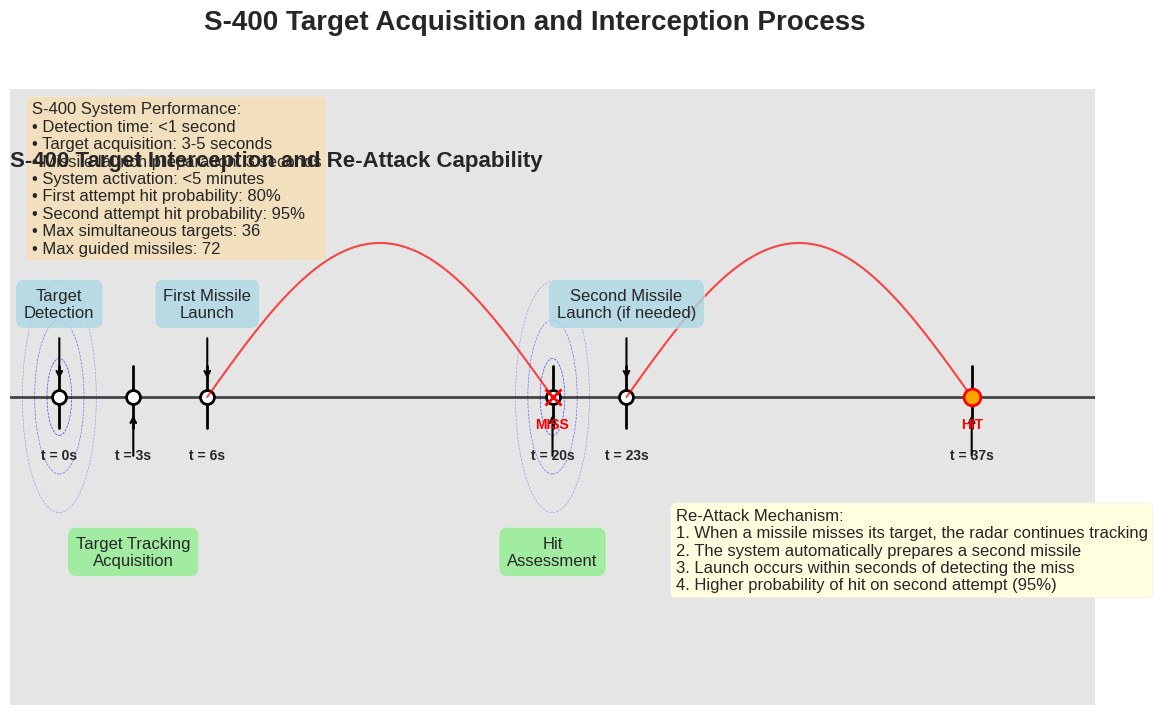

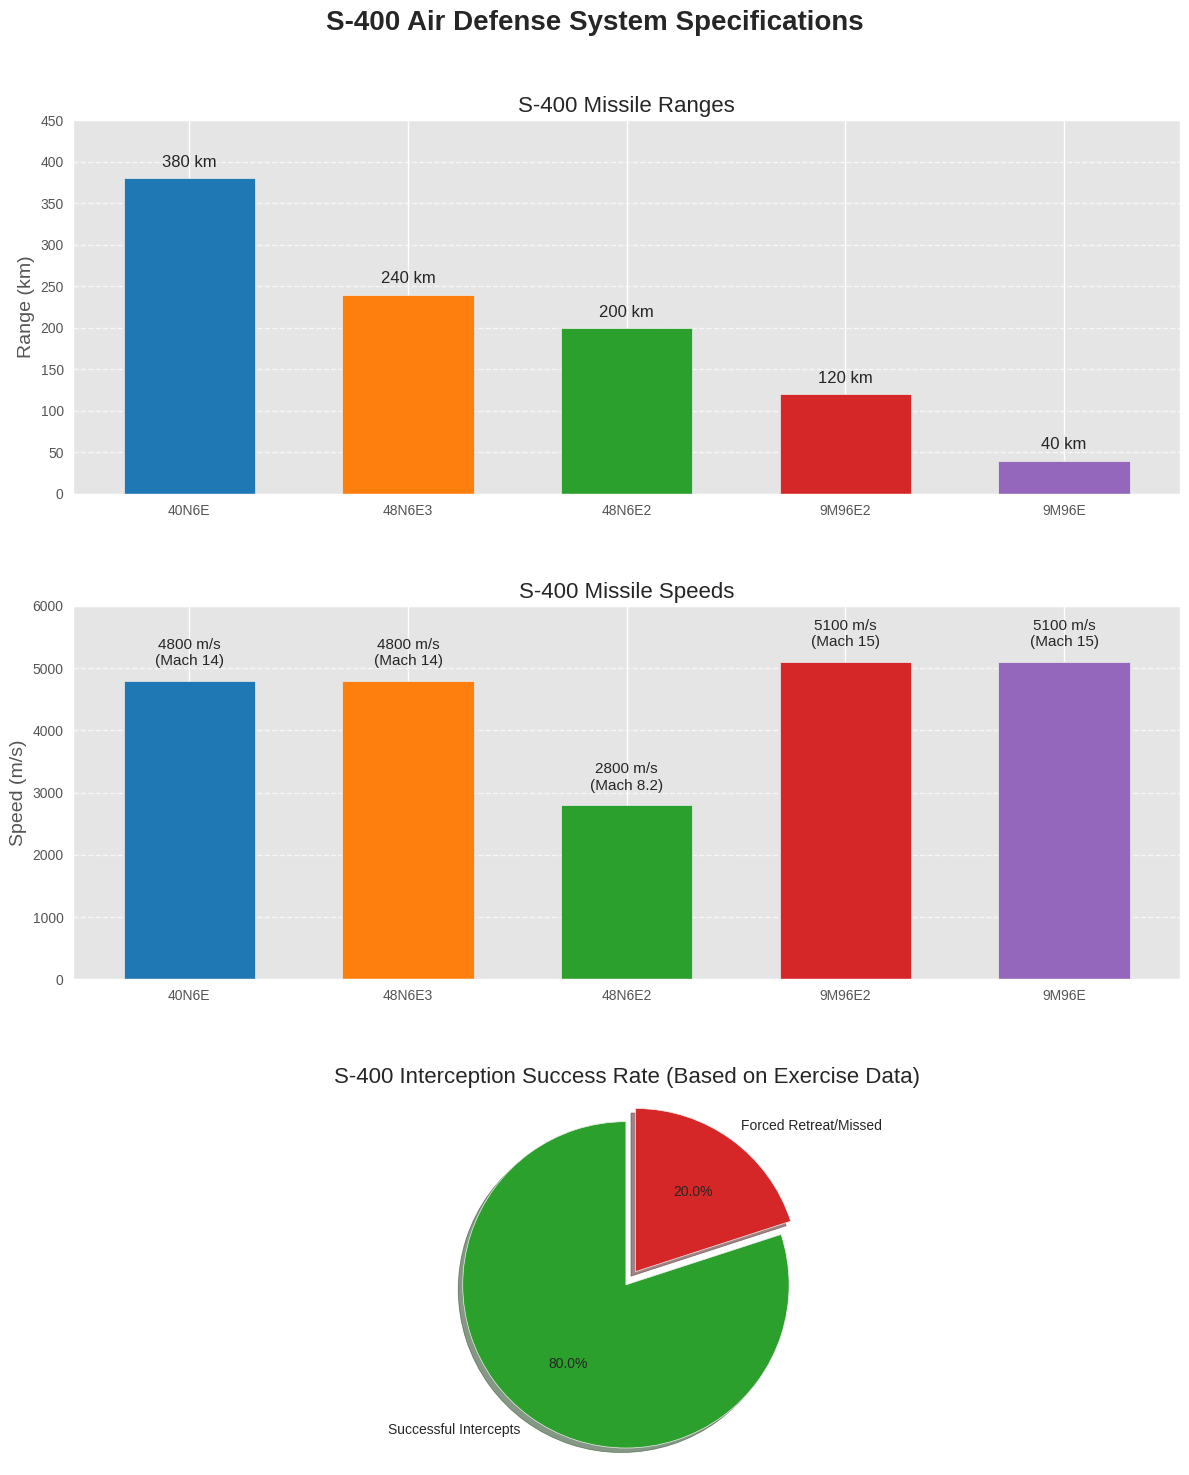

<Figure size 800x550 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.path import Path
from typing import List

# Define a global variable to store image titles
_mfajlsdf98q21_image_title_list = []

# Set the style for plots
plt.style.use('ggplot')

# Create figure 1: Multi-panel figure with bar charts and pie chart
fig1, axes = plt.subplots(3, 1, figsize=(12, 15))
fig1.suptitle('S-400 Air Defense System Specifications', fontsize=20, fontweight='bold', y=0.98)

# Define common colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Panel 1: Missile ranges
missiles = ['40N6E', '48N6E3', '48N6E2', '9M96E2', '9M96E']
ranges = [380, 240, 200, 120, 40]

bars1 = axes[0].bar(missiles, ranges, color=colors, width=0.6)
axes[0].set_title('S-400 Missile Ranges', fontsize=16)
axes[0].set_ylabel('Range (km)', fontsize=14)
axes[0].set_ylim(0, 450)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{height} km', ha='center', va='bottom', fontsize=12)

# Panel 2: Missile speeds
speeds = [4800, 4800, 2800, 5100, 5100]  # m/s
mach_numbers = [14, 14, 8.2, 15, 15]

bars2 = axes[1].bar(missiles, speeds, color=colors, width=0.6)
axes[1].set_title('S-400 Missile Speeds', fontsize=16)
axes[1].set_ylabel('Speed (m/s)', fontsize=14)
axes[1].set_ylim(0, 6000)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels with Mach numbers
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 200,
                f'{height} m/s\n(Mach {mach_numbers[i]})', ha='center', va='bottom', fontsize=11)

# Panel 3: Interception success rate pie chart
success_rate = [80, 20]
labels = ['Successful Intercepts', 'Forced Retreat/Missed']
explode = (0.1, 0)

axes[2].pie(success_rate, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=['#2ca02c', '#d62728'])
axes[2].set_title('S-400 Interception Success Rate (Based on Exercise Data)', fontsize=16)
axes[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig1.subplots_adjust(hspace=0.3)

# Create figure 2: Timeline diagram for target acquisition and interception
fig2, ax = plt.subplots(figsize=(14, 8))
fig2.suptitle('S-400 Target Acquisition and Interception Process', fontsize=20, fontweight='bold')

# Define timeline events and their positions
events = [
    ('Target\nDetection', 0),
    ('Target Tracking\nAcquisition', 3),
    ('First Missile\nLaunch', 6),
    ('Hit\nAssessment', 20),
    ('Second Missile\nLaunch (if needed)', 23),
    ('Re-assessment', 37)
]

# Set up the timeline layout
timeline_y = 4
ax.axhline(y=timeline_y, xmin=0, xmax=1, color='black', linewidth=2, alpha=0.7)
ax.set_ylim(0, 8)
ax.set_xlim(-2, 42)

# Add events to timeline
for i, (event, time) in enumerate(events):
    # Draw vertical line at each time point
    ax.axvline(x=time, ymin=0.45, ymax=0.55, color='black', linewidth=2)

    # Add circular marker
    ax.plot(time, timeline_y, 'o', markersize=10,
            markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)

    # Add time label below the timeline
    ax.text(time, timeline_y - 0.8, f"t = {time}s", ha='center', fontsize=10, fontweight='bold')

    # Add event label (alternating above and below the timeline)
    if i % 2 == 0:
        ax.text(time, timeline_y + 1, event, ha='center', va='bottom', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))
        # Add arrow pointing down to the timeline
        ax.annotate('', xy=(time, timeline_y + 0.2), xytext=(time, timeline_y + 0.8),
                   arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    else:
        ax.text(time, timeline_y - 1.8, event, ha='center', va='top', fontsize=12,
               bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen', alpha=0.8))
        # Add arrow pointing up to the timeline
        ax.annotate('', xy=(time, timeline_y - 0.2), xytext=(time, timeline_y - 0.8),
                   arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Add system performance info box
info_text = (
    "S-400 System Performance:\n"
    "• Detection time: <1 second\n"
    "• Target acquisition: 3-5 seconds\n"
    "• Missile launch preparation: 3 seconds\n"
    "• System activation: <5 minutes\n"
    "• First attempt hit probability: 80%\n"
    "• Second attempt hit probability: 95%\n"
    "• Max simultaneous targets: 36\n"
    "• Max guided missiles: 72"
)

# Add infobox to the plot
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Add missile flight visualization
def draw_missile_path(start_time, end_time, hit=True):
    # Missile path coordinates
    xx = np.linspace(start_time, end_time, 100)
    # Create an arc-like trajectory
    arc_height = 2
    yy = timeline_y + arc_height * np.sin(np.pi * (xx - start_time) / (end_time - start_time))

    # Draw missile path
    ax.plot(xx, yy, 'r-', linewidth=1.5, alpha=0.7)

    # Draw missile icon at the end
    if hit:
        # Explosion for hit
        ax.plot(end_time, timeline_y, 'o', markersize=12, markerfacecolor='orange',
                markeredgecolor='red', markeredgewidth=2)
        ax.text(end_time, timeline_y - 0.4, "HIT", color='red', ha='center', fontsize=10, fontweight='bold')
    else:
        # X mark for miss
        ax.plot(end_time, timeline_y, 'x', markersize=12, color='red', markeredgewidth=2)
        ax.text(end_time, timeline_y - 0.4, "MISS", color='red', ha='center', fontsize=10, fontweight='bold')

# Draw first missile path (miss)
draw_missile_path(6, 20, hit=False)

# Draw second missile path (hit)
draw_missile_path(23, 37, hit=True)

# Add radar waves visualization
def draw_radar_waves(time_point):
    for radius in range(1, 4):
        circle = plt.Circle((time_point, timeline_y), radius/2, fill=False,
                           color='blue', linestyle='--', alpha=0.3 + 0.2 * (3-radius))
        ax.add_patch(circle)

# Draw radar waves at detection and reassessment
draw_radar_waves(0)
draw_radar_waves(20)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add labels and annotations
ax.text(-2, timeline_y + 3, "S-400 Target Interception and Re-Attack Capability",
        fontsize=16, fontweight='bold')

# Add explanation of re-attack mechanism
explanation = (
    "Re-Attack Mechanism:\n"
    "1. When a missile misses its target, the radar continues tracking\n"
    "2. The system automatically prepares a second missile\n"
    "3. Launch occurs within seconds of detecting the miss\n"
    "4. Higher probability of hit on second attempt (95%)"
)
ax.text(25, 1.5, explanation, fontsize=12, bbox=dict(boxstyle='round', facecolor='lightyellow'))

# Append titles to global list
_mfajlsdf98q21_image_title_list.append("S-400 Air Defense System Specifications")
_mfajlsdf98q21_image_title_list.append("S-400 Target Acquisition and Interception Process")

# Display the figures
plt.figure(fig1.number)
plt.show()
plt.figure(fig2.number)
plt.show()


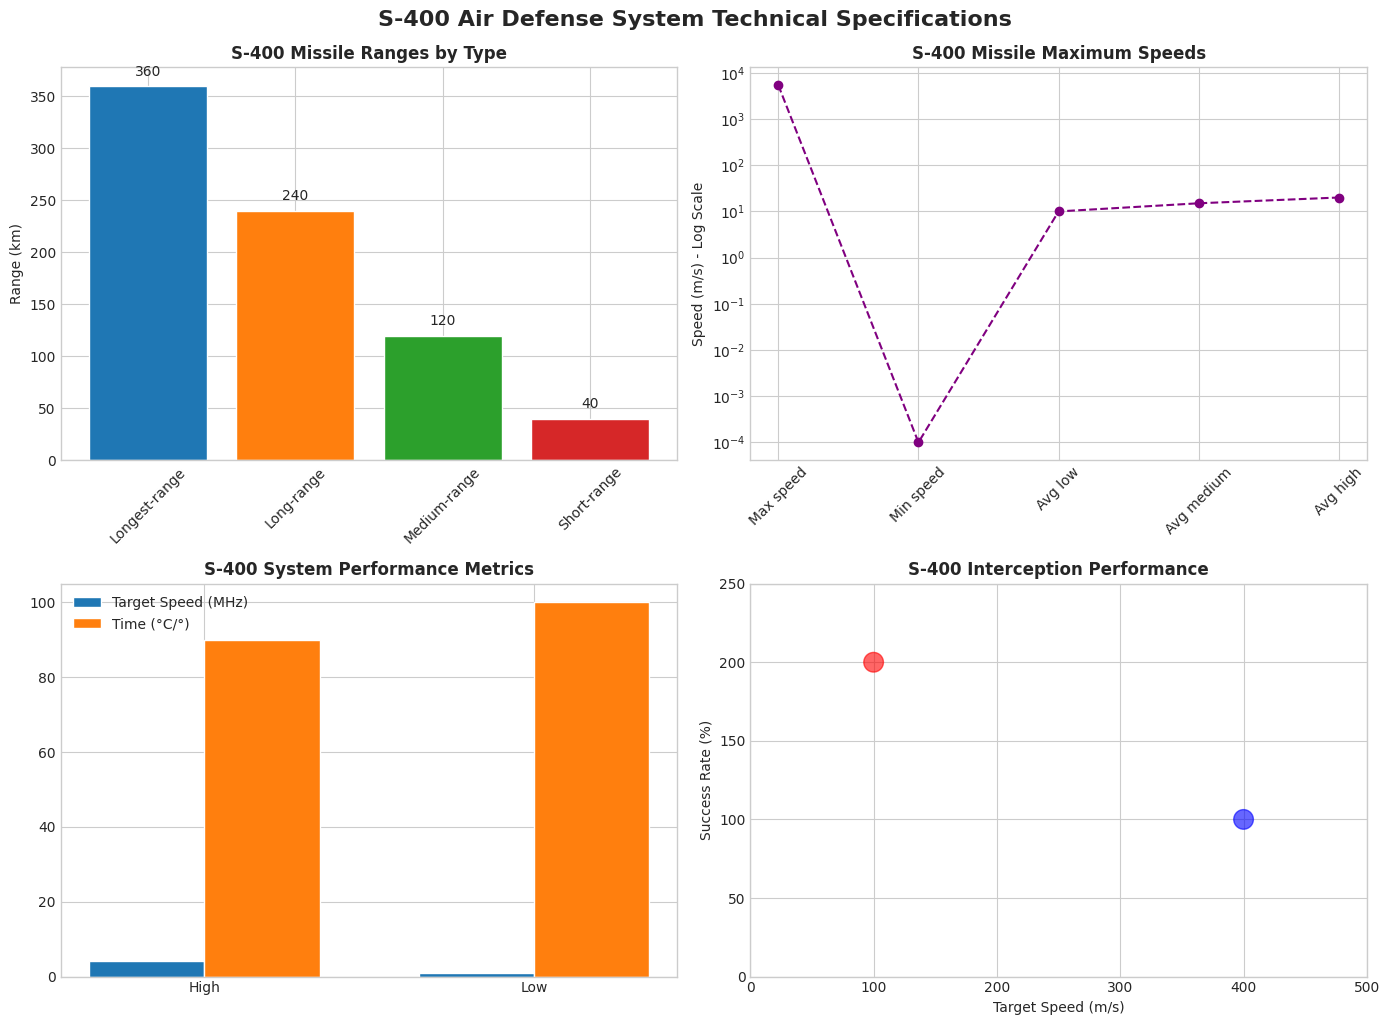

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# 1. Missile Ranges
plt.subplot(2, 2, 1)
ranges = [360, 240, 120, 40]
missile_types = ['Longest-range', 'Long-range', 'Medium-range', 'Short-range']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(missile_types, ranges, color=colors)
plt.title('S-400 Missile Ranges by Type', fontweight='bold')
plt.ylabel('Range (km)')
plt.xticks(rotation=45)
for i, v in enumerate(ranges):
    plt.text(i, v + 10, str(v), ha='center')

# 2. Missile Speeds
plt.subplot(2, 2, 2)
speeds = [5400, 0.0001, 10, 15, 20]
speed_labels = ['Max speed', 'Min speed', 'Avg low', 'Avg medium', 'Avg high']
plt.plot(speed_labels, speeds, marker='o', color='purple', linestyle='--')
plt.title('S-400 Missile Maximum Speeds', fontweight='bold')
plt.ylabel('Speed (m/s) - Log Scale')
plt.yscale('log')
plt.xticks(rotation=45)

# 3. Performance Metrics
plt.subplot(2, 2, 3)
metrics = {
    'Target Speed': [4.2, 0.9],
    'Time Range': [90, 100]
}
x = np.arange(len(metrics['Target Speed']))
width = 0.35
plt.bar(x - width/2, metrics['Target Speed'], width, label='Target Speed (MHz)')
plt.bar(x + width/2, metrics['Time Range'], width, label='Time (°C/°)')
plt.title('S-400 System Performance Metrics', fontweight='bold')
plt.xticks(x, ['High', 'Low'])
plt.legend()

# 4. Interception Performance
plt.subplot(2, 2, 4)
interception = {
    'Speed (m/s)': [100, 400],
    'Success Rate (%)': [200, 100]
}
plt.scatter(interception['Speed (m/s)'], interception['Success Rate (%)'],
            s=200, c=['red', 'blue'], alpha=0.6)
plt.title('S-400 Interception Performance', fontweight='bold')
plt.xlabel('Target Speed (m/s)')
plt.ylabel('Success Rate (%)')
plt.xlim(0, 500)
plt.ylim(0, 250)

plt.tight_layout()
plt.suptitle('S-400 Air Defense System Technical Specifications', y=1.02, fontsize=16, fontweight='bold')
plt.show()

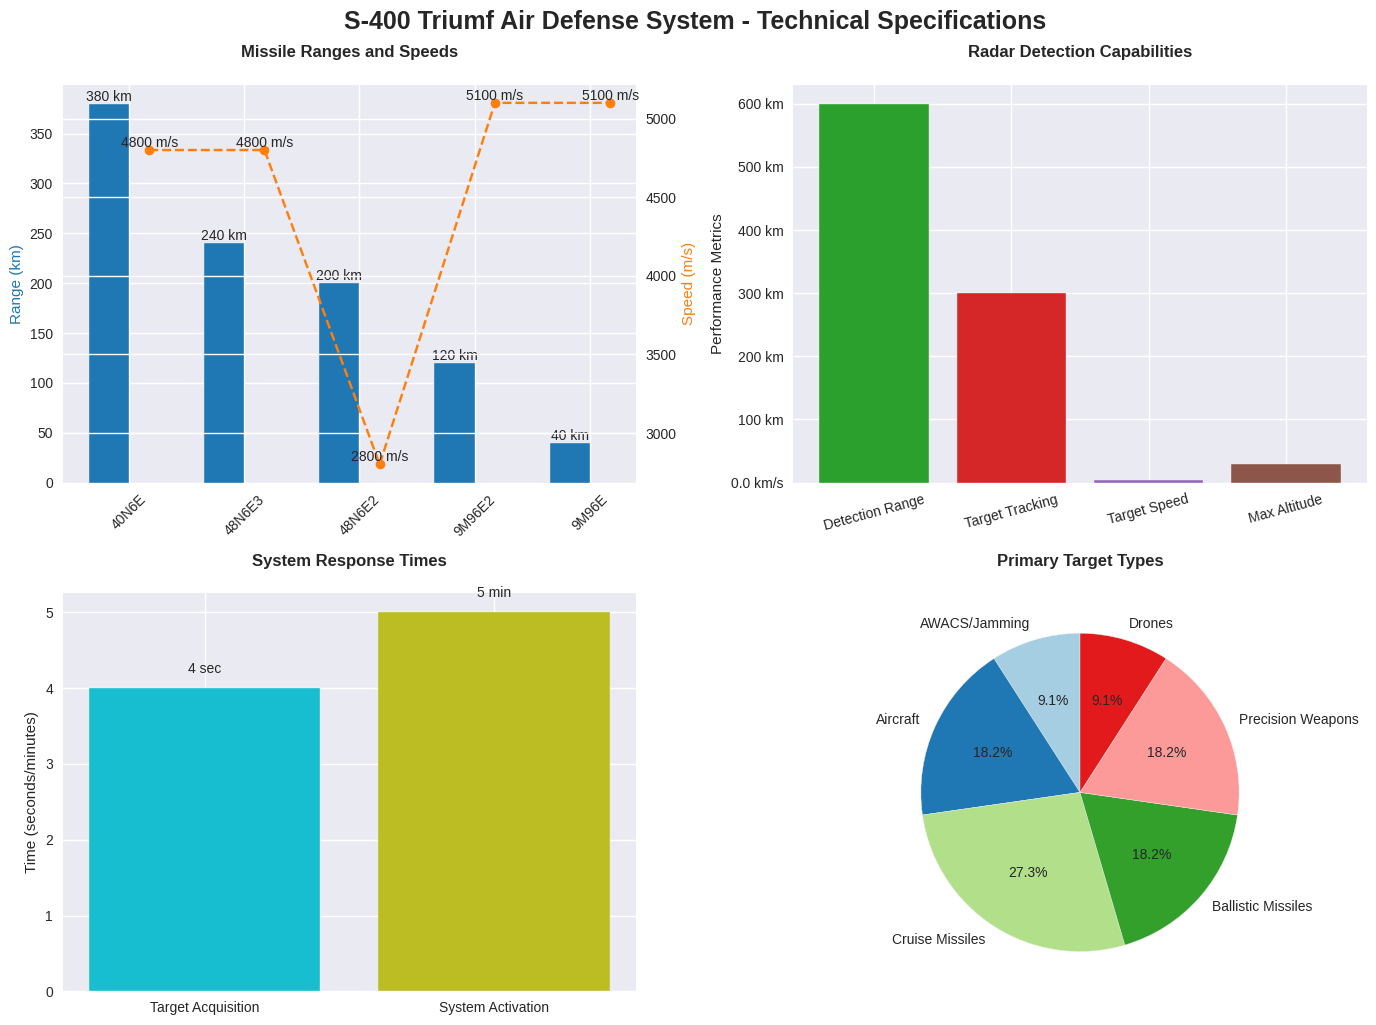

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set a valid style (check available styles with plt.style.available)
plt.style.use('seaborn-v0_8')  # Modern seaborn style
plt.figure(figsize=(14, 10))

# 1. Missile Ranges and Speeds
plt.subplot(2, 2, 1)
missiles = ['40N6E', '48N6E3', '48N6E2', '9M96E2', '9M96E']
ranges = [380, 240, 200, 120, 40]
speeds = [4800, 4800, 2800, 5100, 5100]

ax1 = plt.gca()
ax2 = ax1.twinx()

width = 0.35
x = np.arange(len(missiles))
bars = ax1.bar(x - width/2, ranges, width, color='#1f77b4', label='Range (km)')
lines = ax2.plot(x + width/2, speeds, color='#ff7f0e', marker='o', linestyle='--', label='Speed (m/s)')

ax1.set_title('Missile Ranges and Speeds', fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(missiles, rotation=45)
ax1.set_ylabel('Range (km)', color='#1f77b4')
ax2.set_ylabel('Speed (m/s)', color='#ff7f0e')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)} km', ha='center', va='bottom')

for i, speed in enumerate(speeds):
    ax2.text(x[i] + width/2, speed, f'{speed} m/s', ha='center', va='bottom')

# 2. Radar Capabilities
plt.subplot(2, 2, 2)
capabilities = {
    'Detection Range': 600,
    'Target Tracking': 300,
    'Target Speed': 4.8,
    'Max Altitude': 30
}

colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.bar(capabilities.keys(), capabilities.values(), color=colors)
plt.title('Radar Detection Capabilities', fontweight='bold', pad=20)
plt.ylabel('Performance Metrics')
plt.xticks(rotation=15)

# Format y-axis differently for km and count metrics
def km_formatter(x, pos):
    return f'{int(x)} km' if x >= 1 else f'{x} km/s'

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(km_formatter))

# 3. System Activation Times
plt.subplot(2, 2, 3)
times = {
    'Target Acquisition': 4,  # avg of 3-5 seconds
    'System Activation': 5    # minutes
}

plt.bar(times.keys(), times.values(), color=['#17becf', '#bcbd22'])
plt.title('System Response Times', fontweight='bold', pad=20)
plt.ylabel('Time (seconds/minutes)')

# Add unit labels
for i, (k, v) in enumerate(times.items()):
    unit = 'sec' if i == 0 else 'min'
    plt.text(i, v + 0.2, f'{v} {unit}', ha='center')

# 4. Missile Targets
plt.subplot(2, 2, 4)
targets = {
    'AWACS/Jamming': 1,
    'Aircraft': 2,
    'Cruise Missiles': 3,
    'Ballistic Missiles': 2,
    'Precision Weapons': 2,
    'Drones': 1
}

plt.pie(targets.values(), labels=targets.keys(), autopct='%1.1f%%',
        colors=plt.cm.Paired.colors, startangle=90)
plt.title('Primary Target Types', fontweight='bold', pad=20)

plt.tight_layout()
plt.suptitle('S-400 Triumf Air Defense System - Technical Specifications', y=1.02,
             fontsize=18, fontweight='bold')
plt.show()

In [ ]:
plt.savefig('s400_visualization.png', dpi=300, bbox_inches='tight')


<Figure size 800x550 with 0 Axes>